# Employee Retention

Employee turn-over is a very costly problem for companies. Understanding
why and when employees are most likely to leave can lead to actions to improve employee
retention as well as planning new hiring in advance.In this challenge, use a data set with info about the employees and have to predict when employees are going to quit by understanding the main drivers of employee churn.

## Objective
* 1.predict when employees are going to quit
* 2.main drivers of employee churn 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# Import datetime
import datetime

# Import stats from scipy
from scipy import stats

# 1. Data Discovering and Processing

In [2]:
df = pd.read_csv('employee_retention.csv')
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   employee_id  24702 non-null  float64
 1   company_id   24702 non-null  int64  
 2   dept         24702 non-null  object 
 3   seniority    24702 non-null  int64  
 4   salary       24702 non-null  float64
 5   join_date    24702 non-null  object 
 6   quit_date    13510 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


employee id is unique

In [4]:
df.employee_id.nunique()==len(df)

True

In [5]:
df.describe(include='all')

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
count,24702.000000,24702.000000,24702,24702.000000,24702.000000,24702,13510
unique,NaN,NaN,6,NaN,NaN,995,664
top,NaN,NaN,customer_service,NaN,NaN,2012-01-03,2015-05-08
freq,NaN,NaN,9180,NaN,NaN,105,111
mean,501604.403530,3.426969,NaN,14.127803,138183.345478,NaN,NaN
std,288909.026101,2.700011,NaN,8.089520,76058.184573,NaN,NaN
min,36.000000,1.000000,NaN,1.000000,17000.000000,NaN,NaN
25%,250133.750000,1.000000,NaN,7.000000,79000.000000,NaN,NaN
50%,500793.000000,2.000000,NaN,14.000000,123000.000000,NaN,NaN
75%,753137.250000,5.000000,NaN,21.000000,187000.000000,NaN,NaN


## 1.1 remove outliers

from above table, check the outliers 99 in seniority and 4080000 in salary

In [6]:
df[df.seniority>90]

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09
24701,604052.0,1,marketing,99,185000.0,2011-07-26,2013-12-06


In [7]:
#remove the 2 outliers
df=df[df.seniority<90] 
df.shape

(24700, 7)

since only 2 outliers, so simply remove it, and salary>400000 looks normal since it mainly focused on department engineer and data science

In [8]:
df[df.salary>300000]['dept'].value_counts()

engineer        547
data_science    399
Name: dept, dtype: int64

## 1.2 convert data type

In [9]:
df['join_date']=pd.to_datetime(df['join_date'])
df['quit_date']=pd.to_datetime(df['quit_date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24700 entries, 0 to 24699
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   employee_id  24700 non-null  float64       
 1   company_id   24700 non-null  int64         
 2   dept         24700 non-null  object        
 3   seniority    24700 non-null  int64         
 4   salary       24700 non-null  float64       
 5   join_date    24700 non-null  datetime64[ns]
 6   quit_date    13508 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 1.5+ MB


In [11]:
# based on project requirement, the employee join and quit date must between 2011-01-24 and 2015-12-13
ends = datetime.datetime.strptime('2015-12-13','%Y-%m-%d')
starts = datetime.datetime.strptime('2011-01-24','%Y-%m-%d')
print(df['join_date'].max()<=ends)
print(df['join_date'].min()>=starts)
print(df['quit_date'].max()<=ends)
print(df['quit_date'].min()>=starts)

True
True
True
True


## 1.3 create new column employ_days and fill in missing values

In [12]:
# create new column
df['employ_days'] = (df.quit_date-df.join_date).dt.days
# fill in msising value for emply days with ends day in 2015-12-13
df['employ_days'].fillna((ends-df.join_date).dt.days,inplace=True)

In [13]:
# we can see that the employ days do not have missing values now
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24700 entries, 0 to 24699
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   employee_id  24700 non-null  float64       
 1   company_id   24700 non-null  int64         
 2   dept         24700 non-null  object        
 3   seniority    24700 non-null  int64         
 4   salary       24700 non-null  float64       
 5   join_date    24700 non-null  datetime64[ns]
 6   quit_date    13508 non-null  datetime64[ns]
 7   employ_days  24700 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(1)
memory usage: 1.7+ MB


 create target variable churn: if employee left, churn=1, else churn=0

In [14]:
#make churn=1 as default
df['churn'] = 1 
# change churn to be 0 if quite_date is null, which means employee did not left company
df.loc[df['quit_date'].isnull(),'churn']=0

In [15]:
df.churn.value_counts()

1    13508
0    11192
Name: churn, dtype: int64

In [16]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employ_days,churn
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0,1
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,426.0,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0,1


# 2. Hypothesis and testing

* Null hypothesis: There is no difference between the stayed employees and left employees between 2011 Jan and 2015 Dec
* two-side T test will run for numeric features and Chi square test for categorical features

In [17]:
employee_stay =  df[df.churn==0].copy()
employee_quit =  df[df.churn==1].copy()
numeric_cols = ['seniority', 'salary','employ_days']
categorical_cols = ['company_id','dept']

we can see from below p-value result, for salary and employed days, it seems that it make employees quit, and show some significant diffence, but for seniority(number of years of work experience when hired), it does not seem to make significant difference between stayed and left employees

In [18]:
for col in numeric_cols:
    test_num = stats.ttest_ind(employee_quit[col],employee_stay[col]) # do two-sided t test
    print('{}:{}'.format(col,test_num))

seniority:Ttest_indResult(statistic=-0.04298362740450959, pvalue=0.9657149327010421)
salary:Ttest_indResult(statistic=-5.763520586411431, pvalue=8.335694924613824e-09)
employ_days:Ttest_indResult(statistic=18.825437588630404, pvalue=1.6581403916833545e-78)


from Chi-square test we can see that company id does not make significant difference, but departement do seem to affect the churn rate

In [19]:
for col in categorical_cols:
    temp_table = pd.crosstab(df['churn'],df[col]) # index is churn=0 or 1, column = each type in col
    # do chi square test on categorical columns : company_id and dept
    score, p_value, dof, array = stats.chi2_contingency(temp_table)
    print('Chi-square for column {}: with score {} and p-value: {} under degree {}'.format(col,score,p_value,dof))

Chi-square for column company_id: with score 19.01931996696012 and p-value: 0.06074759035554246 under degree 11
Chi-square for column dept: with score 42.32790836528519 and p-value: 5.0556024084381965e-08 under degree 5


# 3. Exploratory data analysis

from below plot, it seems that employees usually left after they joined the company for 1 year and then the end of 2 years

## 3.1 employ day

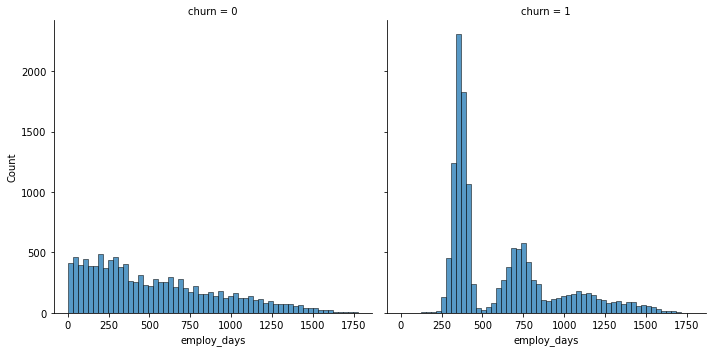

In [20]:
sns.displot(df, x="employ_days", col="churn")

## 3.2 Bootstrap to check numeric column

use bootstrap to get 1000 means and show churned and stayed employees information from seniority, salary and employed days on 95% confidence level

In [21]:
# Define the self-built function of bootstrap
def bootstrap(cols,sample_counts):
# create empty arrays with specific number of samples
    left_employees_bootstrap = np.empty(sample_counts)
    stay_employees_bootstrap = np.empty(sample_counts)
# each time, generate random sample with size employee_quit, then calcuate mean; and this step will repeat
# for 1000 times, so that we have 1000 means in this array left_employees_bootstrap
    for i in range(sample_counts):
        left_employees_bootstrap[i]=np.mean(np.random.choice(employee_quit[cols],len(employee_quit)))
        stay_employees_bootstrap[i]=np.mean(np.random.choice(employee_stay[cols],len(employee_stay)))

    return left_employees_bootstrap,stay_employees_bootstrap



seniority
95% confidence level on Churned Employees: [13.98458506 14.25720499] 
		     on Current Employees: [13.9797802  14.27914805]


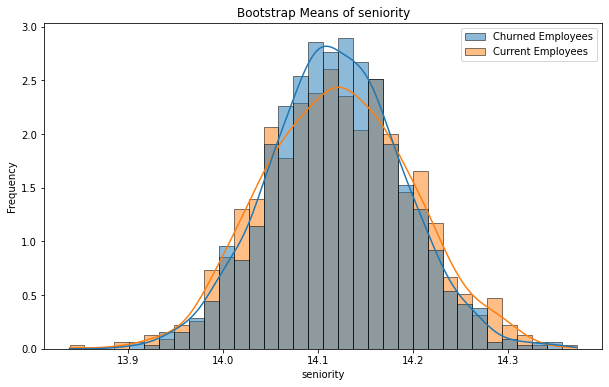


salary
95% confidence level on Churned Employees: [134450.43492745 136811.53390583] 
		     on Current Employees: [139724.22936026 142754.7020193 ]


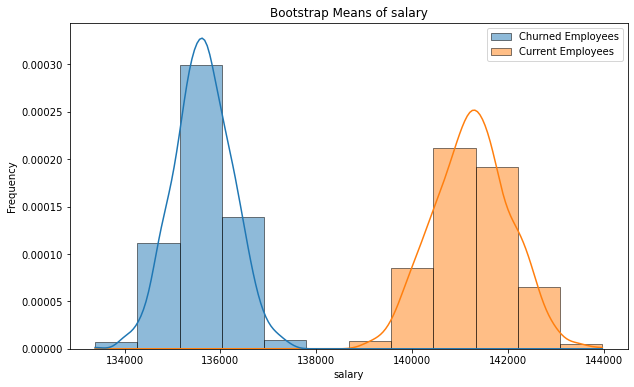


employ_days
95% confidence level on Churned Employees: [608.35372557 619.47447994] 
		     on Current Employees: [519.71130942 534.44498972]


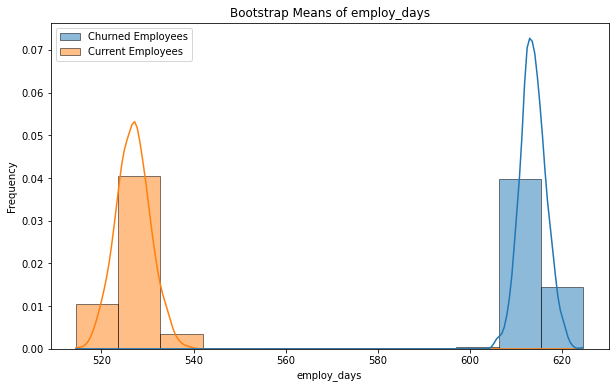

In [34]:
for col in numeric_cols:
    left_employees_copy, stay_employees_copy = bootstrap(col,1000)
# Returns the q-th percentile(s) of the array elements for 95% confidence level
    confidence_interval_left = np.percentile(left_employees_copy,[2.5,97.5])
    confidence_interval_stay = np.percentile(stay_employees_copy,[2.5,97.5])

# show confidence interval
    print('\n{}'.format(col))
    print('95% confidence level on Churned Employees:', confidence_interval_left,'\n\t\t','    on Current Employees:' , confidence_interval_stay)

    plt.figure(figsize=(10,6))
# change to flattened array to show different legend color in histplot
    x1= np.ravel(left_employees_copy)
    y1= np.ravel(stay_employees_copy)
# histplot with density curve
    sns.histplot({'Churned Employees': x1, 'Current Employees': y1}, kde=True, stat='density',linewidth=0.5)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Bootstrap Means of {}'.format(col))
    plt.show()


bootstrap results are align with the two-sided t test for numeric columns: employed days and salary make churn and stayed employees to be signficantly different.

Also the left employees' salary are way more less than the current employees, also most employees left the company after 2 years.

## 3.3 countplot to check categorical column

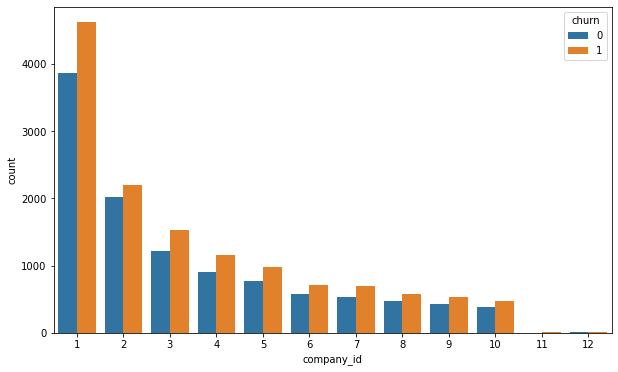

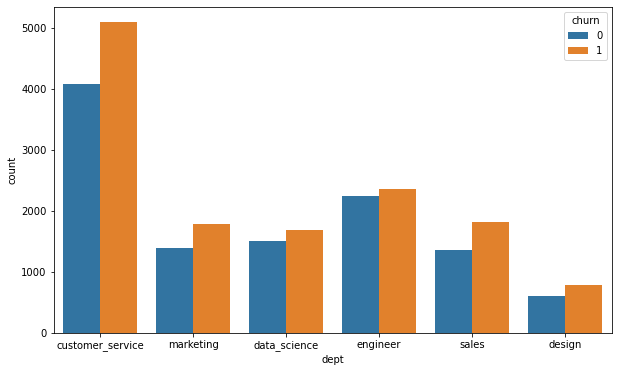

In [38]:
for col in categorical_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df,x=col,hue='churn')
    plt.show()

all 12 companies have number of employees left higher than that of stayed employees, same as department, since from below plots, we can see that the churn rates all above 50%
* for company, company id 11 has the highest churn rate around 75%, lowest is company 12, around 50%; 
* for department, the highest churn rates occurs in sales, followed by design and marketing, the lower churn rates are in data science and engineer, but overall, the absolute values of churn rate among different departments are not too much, within 6%

## 3.4 boxplot to check churn rate 

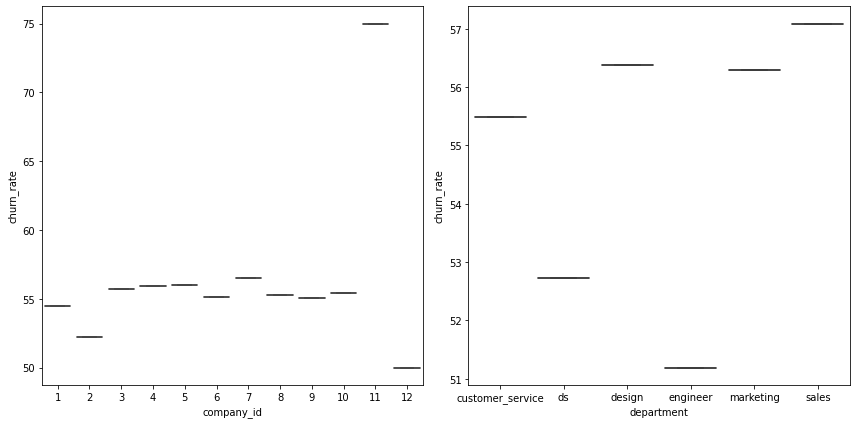

In [148]:
def groupby_table(col,num):
    table = df.groupby([col,'churn'],as_index=False)['employee_id'].count()
    churns=table[table.churn==1].employee_id # get churn rows
    churns.index=np.arange(num,len(churns)+1)
    return churns # return churn rows

# company churn rate    
company=round(groupby_table('company_id',1)/df.company_id.value_counts().sort_index()*100,2).to_frame('churn_rate').reset_index(level=0).rename(columns={'index':'company_id'})

# department churn rate
temp=df.dept.value_counts().sort_index().to_frame().reset_index().drop(columns='index') 
temp.index= np.arange(1,len(temp)+1)
dept=round(groupby_table('dept',1)/temp.squeeze()*100,2).to_frame('churn_rate').reset_index(level=0).rename(columns={'index':'department'})

fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.boxplot(data=company,x='company_id',y='churn_rate',ax=ax[0])
g=sns.boxplot(data=dept,x='department',y='churn_rate',ax=ax[1])
g.set_xticklabels(['customer_service','ds','design','engineer','marketing','sales'])
fig.tight_layout()
plt.show()

regarding company 11 and 12 with the greatest and lowest churn rates, in company 11, current employees pay more less than the other peers

In [150]:
company_df = df.groupby(['company_id', 'churn']).agg({'seniority':'mean', 'salary':'mean', 'employ_days':'mean'})
company_df.loc[[11,12]]

seniority    salary  employ_days
company_id churn                                  
11         0      11.500000   55000.0   812.500000
           1      15.333333  127750.0   550.416667
12         0      11.166667   75250.0   638.000000
           1      11.166667   70750.0   465.166667

## 3.5 join and quit dates

check whether or not join dates and quit dates affect the churn rate

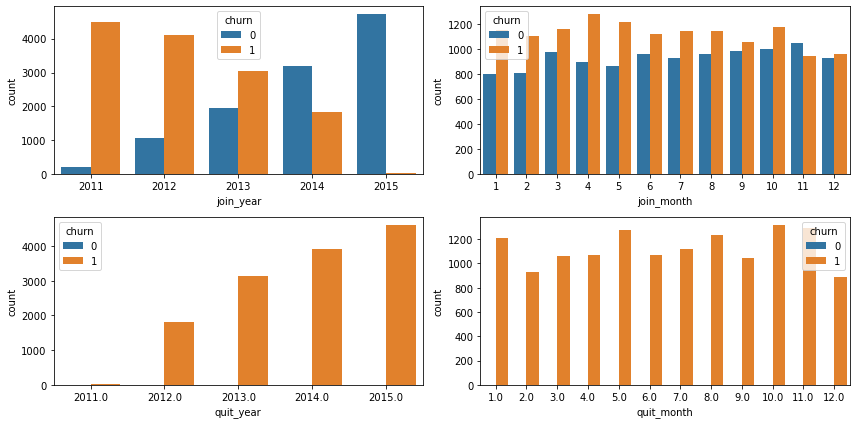

In [164]:
dates = df.copy()
dates['join_year'] = df.join_date.dt.year
dates['join_month'] = df.join_date.dt.month
dates['quit_year'] = df.quit_date.dt.year
dates['quit_month'] = df.quit_date.dt.month
times = ['join_year','join_month','quit_year','quit_month']

# get multiple countplot on same plots
fig, axes =  plt.subplots(2,2,figsize=(12,6),sharex=False)
for col,ax in zip(times,axes.ravel()):   
    sns.countplot(data=dates,x=col,hue='churn',ax=ax)
fig.tight_layout()
plt.show()

the majority of employees who joined in 2011 have gradually left in the next 4 years until 2015; the higher churn rate happens in April and May, December is the lowest

# 4.Model

In [177]:
model_df = dates.copy().drop(columns=['employee_id'])
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24700 entries, 0 to 24699
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   company_id   24700 non-null  int64         
 1   dept         24700 non-null  object        
 2   seniority    24700 non-null  int64         
 3   salary       24700 non-null  float64       
 4   join_date    24700 non-null  datetime64[ns]
 5   quit_date    13508 non-null  datetime64[ns]
 6   employ_days  24700 non-null  float64       
 7   churn        24700 non-null  int64         
 8   join_year    24700 non-null  int64         
 9   join_month   24700 non-null  int64         
 10  quit_year    13508 non-null  float64       
 11  quit_month   13508 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(5), object(1)
memory usage: 2.4+ MB


## 4.1 convert categorical data into numeric 

In [183]:
from sklearn.preprocessing import LabelEncoder
model_df['dept'] = LabelEncoder().fit_transform(model_df['dept'])
model_df.head()

,company_id,dept,seniority,salary,join_date,quit_date,employ_days,churn,join_year,join_month,quit_year,quit_month
0,7,0,28,89000.0,2014-03-24,2015-10-30,585.0,1,2014,3,2015.0,10.0
1,7,4,20,183000.0,2013-04-29,2014-04-04,340.0,1,2013,4,2014.0,4.0
2,4,4,14,101000.0,2014-10-13,NaT,426.0,0,2014,10,NaN,NaN
3,7,0,20,115000.0,2012-05-14,2013-06-07,389.0,1,2012,5,2013.0,6.0
4,2,1,23,276000.0,2011-10-17,2014-08-22,1040.0,1,2011,10,2014.0,8.0


In [184]:
x = model_df.drop(['churn','join_date','quit_date','quit_year','quit_month'],axis=1)
y = model_df['churn']
# Split data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [185]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24700 entries, 0 to 24699
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   company_id   24700 non-null  int64  
 1   dept         24700 non-null  int64  
 2   seniority    24700 non-null  int64  
 3   salary       24700 non-null  float64
 4   employ_days  24700 non-null  float64
 5   join_year    24700 non-null  int64  
 6   join_month   24700 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 1.5 MB


## 4.2 train model

In [187]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

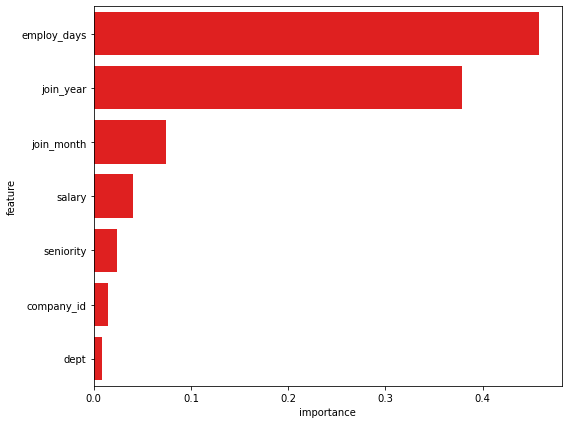

In [190]:
importances = rf.feature_importances_
features = pd.DataFrame({'feature': x.columns, 'importance': importances})
features.sort_values(by='importance', ascending=False, inplace=True)

# Display a horizontal barplot with the feature importances
plt.figure(figsize=(8,6))
sns.barplot(x=features['importance'], y=features['feature'], color='red', orient='h')
plt.tight_layout()

In [193]:
# Predit the test data
from sklearn.metrics import roc_auc_score
# get predict result from x_test
predicted_result = rf.predict_proba(x_test)[:, -1]
# compare the real test result with predicted result
print('Score:{}'.format(roc_auc_score(y_test, predicted_result)))

Score:0.997544734130967


## 4.3 Predict the conversion rate

In [194]:
predicted_churn_rate = predicted_result.sum() / len(predicted_result)

# print the final result
print ('Predicted Employee Churn Rate: {:.2f}%'.format(predicted_churn_rate * 100))
print ('Actual Churn Rate: {:.2f}%'.format(np.mean(y_test) * 100))

Predicted Employee Churn Rate: 55.01%
Actual Churn Rate: 55.55%


summary
* the join dates are quite import to the churn reate
* employees usually leave in the second or the end of the first year
* low salary employees often quit the job